<a href="https://colab.research.google.com/github/ralinavalieva/1lab/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

In [2]:
import pandas as pd  # Библиотека для работы с данными в табличном формате


data = pd.read_csv('/content/students.csv', encoding='utf-8', sep = ',') # Загрузка данных из CSV-файла (encoding='utf-8' чтение русских слов)

print("\n Первые 5 строк данных:") # Выводим 5 первых строк датасета для ознакомления
print(data.head())  # По умолчанию выводит 5 строк

print("\n Информация о данных:") # Выводим информации о структуре данных
print(data.info())  # Показывает типы данных, количество ненулевых значений и использование памяти

print("\n Описательная статистика числовых данных:") # Выводим сводную статистику по числовым столбцам
print(data.describe())  # Для столбцов (Age, Score) показывает count(Кол-во непустых знач.), mean, std(стандарт. отклонене), min, max и квантили(25%,50%,74%)

print("\n Анализ успеваемости:") # Выводим среднего балла студентов
average_score = data['Score'].mean()  # Вычисляем среднего арифметического
student_amount = data.groupby('Group')['Score'].count()  # Группируем данные и считаем кол-во студентов в каждой группе
print(f"Средний балл студентов: {average_score}")
print(student_amount)


 Первые 5 строк данных:
       Name  Age Group  Score
0   Алексей   20    A1     85
1      Анна   21    A1     78
2     Борис   19    B2     92
3  Виктория   22    B2     88
4   Дмитрий   20    C3     76

 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    25 non-null     object
 1   Age     25 non-null     int64 
 2   Group   25 non-null     object
 3   Score   25 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 932.0+ bytes
None

 Описательная статистика числовых данных:
             Age     Score
count  25.000000  25.00000
mean   21.320000  84.48000
std     1.281926   6.13134
min    19.000000  75.00000
25%    20.000000  79.00000
50%    21.000000  85.00000
75%    22.000000  89.00000
max    24.000000  95.00000

 Анализ успеваемости:
Средний балл студентов: 84.48
Group
A1    6
B2    6
C3    5
D4    4
E5    4
Name: Sco

In [3]:
import pandas as pd  # Библиотека для работы с данными в табличном формате


data = pd.read_csv('/content/students.csv', encoding='utf-8', sep = ',') # Загрузка данных из CSV-файла (encoding='utf-8' чтение русских слов)

high_scorers = data[data['Score'] > 80] # Фильтрация: балл > 80

top_students = high_scorers.sort_values('Score', ascending=False) # Сортировка по убыванию балла

# Поиск возрастных экстремумов
oldest = data.loc[data['Age'].idxmax()]  # Самый старший
youngest = data.loc[data['Age'].idxmin()]  # Самый младший

# Вывод результатов
print("Топ студенты (балл > 80):")
print(top_students[['Name', 'Score']])

print(f"\nСамый старший: {oldest['Name']}, {oldest['Age']} лет")
print(f"Самый младший: {youngest['Name']}, {youngest['Age']} лет")

Топ студенты (балл > 80):
        Name  Score
23     Лилия     95
19  Светлана     94
15     Роман     93
2      Борис     92
11   Наталья     91
6     Сергей     90
9      Дарья     89
21  Катерина     88
3   Виктория     88
17    Михаил     87
13      Олег     86
0    Алексей     85
22  Владимир     85
10    Максим     84
14      Юлия     83
7   Кристина     82
18   Евгений     81

Самый старший: Дарья, 24 лет
Самый младший: Борис, 19 лет


In [4]:
import pandas as pd

data = pd.read_csv('/content/students_with_gaps.csv', encoding='utf-8', sep = ',') # Загрузка данных из CSV-файла (encoding='utf-8' чтение русских слов)

# Проверка пропусков
print("Количество пропусков по столбцам:")
print(data.isnull().sum()) # выводит количество NaN (пустые ячейки) по столбцам

mean_score = data['Score'].mean() # Вычисляет ср. знач. в столбце Score
data['Score'] = data['Score'].fillna(mean_score) # заменяем пустые знач Score на ср балл

# Удаление строк с пропусками в Group
data = data.dropna(subset=['Group'])

print("\nПосле обработки пропусков:")
print(data.isnull().sum()) # Проверку на наличие пропущенных данных

# Сохранение очищенных данных
data.to_csv('students_clean.csv', index=False)

Количество пропусков по столбцам:
Name     0
Age      0
Group    3
Score    5
dtype: int64

После обработки пропусков:
Name     0
Age      0
Group    0
Score    0
dtype: int64


In [5]:
import pandas as pd  # Библиотека для работы с данными в табличном формате


data = pd.read_csv('/content/students.csv', encoding='utf-8', sep = ',') # Загрузка данных из CSV-файла

print("\nСредний балл по группам:")
print(data.groupby('Group')['Score'].mean())  # Средний балл для каждой группы

print("\nМедианный возраст по группам:")
print(data.groupby('Group')['Age'].median())  # Медиана возраста по группам

data['Passed'] = data['Score'].apply(lambda x: 1 if x >= 60 else 0)  # Добавляем новый столбец Passed (1, если балл ≥ 60, иначе 0)
print("\nПолные данные с результатами:")
print(data)  # Вывод всех данных с новым столбцом


Средний балл по группам:
Group
A1    83.666667
B2    87.166667
C3    82.000000
D4    84.500000
E5    84.750000
Name: Score, dtype: float64

Медианный возраст по группам:
Group
A1    21.0
B2    21.5
C3    21.0
D4    21.5
E5    21.5
Name: Age, dtype: float64

Полные данные с результатами:
        Name  Age Group  Score  Passed
0    Алексей   20    A1     85       1
1       Анна   21    A1     78       1
2      Борис   19    B2     92       1
3   Виктория   22    B2     88       1
4    Дмитрий   20    C3     76       1
5      Елена   23    C3     80       1
6     Сергей   21    D4     90       1
7   Кристина   22    D4     82       1
8      Игорь   20    E5     75       1
9      Дарья   24    E5     89       1
10    Максим   21    A1     84       1
11   Наталья   22    A1     91       1
12    Андрей   20    B2     77       1
13      Олег   23    B2     86       1
14      Юлия   21    C3     83       1
15     Роман   22    C3     93       1
16      Инна   20    D4     79       1
17    Мих

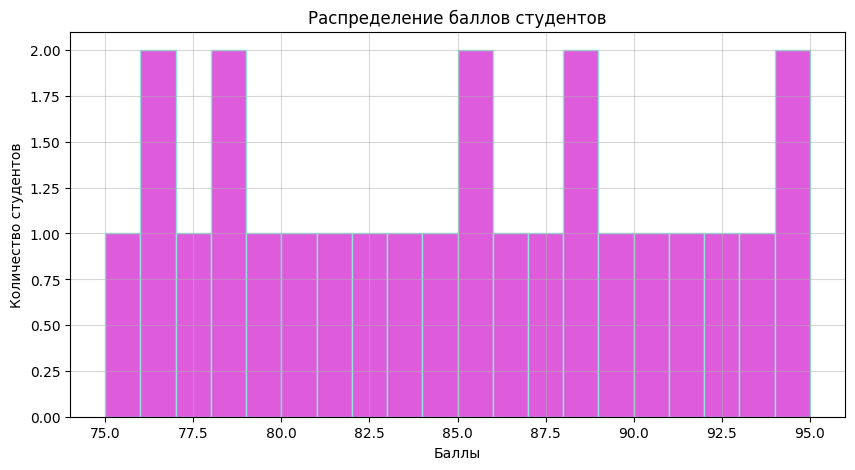

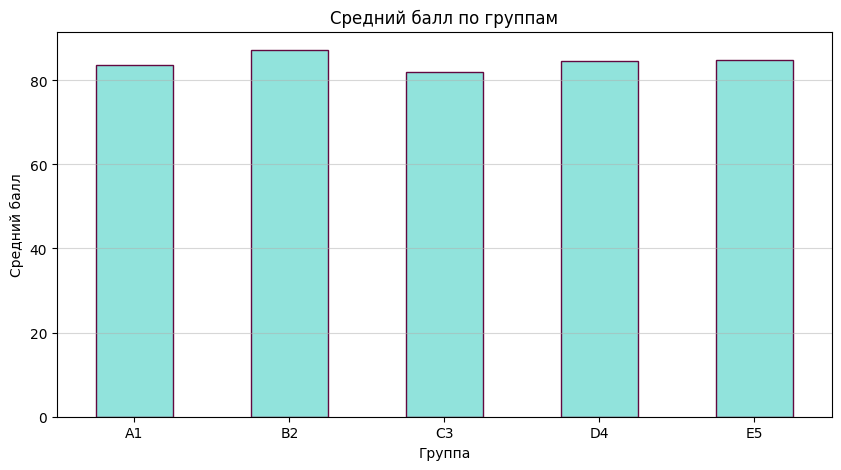

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/students.csv', encoding='utf-8', sep = ',') # Загрузка данных из CSV-файла (encoding='utf-8' чтение русских слов)

# 1. Гистограмма распределения баллов
plt.figure(figsize=(10, 5))
data['Score'].hist(bins=20, color='#DE5BDC', edgecolor='#91E3DC')
plt.title('Распределение баллов студентов')
plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.grid(alpha=0.5)
plt.show()

# 2. Столбчатая диаграмма по группам
plt.figure(figsize=(10, 5))
data.groupby('Group')['Score'].mean().plot(kind='bar', color='#91E3DC', edgecolor='#620940')
plt.title('Средний балл по группам')
plt.xlabel('Группа')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.show()